# Install tenserflow and keras

# Load dataset as Keras Api

In [4]:
!pip install opendatasets

In [5]:
import opendatasets as op
op.download("https://www.kaggle.com/datasets/hamdallak/the-iqothnccd-lung-cancer-dataset/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ankitkumarformal
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/hamdallak/the-iqothnccd-lung-cancer-dataset


100%|██████████| 149M/149M [00:00<00:00, 1.29GB/s]

# Preprocess data

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Path to your dataset folder
data_dir = "/content/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset"

# Class folders
classes = ["Bengin cases", "Malignant cases", "Normal cases"]

X = []  # images store in X
y = []  # labels store in y

# Loop through each class folder
for label, category in enumerate(classes):
    folder = os.path.join(data_dir, category)
    for file in os.listdir(folder):
        img_path = os.path.join(folder, file)
        img = cv2.imread(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # convert to grayscale
        if img is not None:
            img = cv2.resize(img, (128, 128))  # resize all to 64x64
            img = np.expand_dims(img, axis=-1) # (128,128,1) for gray scale
            X.append(img)  # flatten to 1D
            y.append(label)

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Split into train/test (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Data visualization

In [7]:
print("Shape of x_train",x_train.shape)
print("Shape of y_train",y_train.shape)
print("Shape of x_test",x_test.shape)
print("Shape of y_test",y_test.shape)

Shape of x_train (877, 128, 128, 1)
Shape of y_train (877,)
Shape of x_test (220, 128, 128, 1)
Shape of y_test (220,)


In [8]:
print("x_train : " , x_train)

x_train :  [[[[38]
   [38]
   [38]
   ...
   [38]
   [38]
   [38]]

  [[38]
   [38]
   [38]
   ...
   [38]
   [38]
   [38]]

  [[38]
   [38]
   [38]
   ...
   [38]
   [38]
   [38]]

  ...

  [[38]
   [38]
   [38]
   ...
   [38]
   [38]
   [38]]

  [[38]
   [38]
   [38]
   ...
   [38]
   [38]
   [38]]

  [[38]
   [38]
   [38]
   ...
   [38]
   [38]
   [38]]]


 [[[38]
   [38]
   [38]
   ...
   [38]
   [38]
   [38]]

  [[38]
   [38]
   [38]
   ...
   [38]
   [38]
   [38]]

  [[38]
   [38]
   [38]
   ...
   [38]
   [38]
   [38]]

  ...

  [[38]
   [38]
   [38]
   ...
   [38]
   [38]
   [38]]

  [[38]
   [38]
   [38]
   ...
   [38]
   [38]
   [38]]

  [[38]
   [38]
   [38]
   ...
   [38]
   [38]
   [38]]]


 [[[38]
   [38]
   [38]
   ...
   [38]
   [38]
   [38]]

  [[38]
   [38]
   [38]
   ...
   [38]
   [38]
   [38]]

  [[38]
   [38]
   [38]
   ...
   [38]
   [38]
   [38]]

  ...

  [[38]
   [38]
   [38]
   ...
   [38]
   [38]
   [38]]

  [[38]
   [38]
   [38]
   ...
   [38]
   [38]
   [3

In [9]:
print(np.unique(x_train))

[  0   1   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 243 244 245 246 247 248 249 25

In [10]:
print("0 -> Benign cancer case , 1 -> Malignant cancer cases , 2 -> Normal case\n")
print(y_train)

0 -> Benign cancer case , 1 -> Malignant cancer cases , 2 -> Normal case

[0 0 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 2 1 2 1 2 2 1 1 2 0 1 1 2 2 0 1 0 1 1 1
 1 1 0 1 1 1 2 1 1 1 2 2 1 2 1 1 1 0 1 0 2 2 2 2 2 1 1 1 1 0 1 1 1 1 1 1 1
 2 1 2 2 1 1 1 2 1 2 1 0 1 1 1 2 1 2 2 2 1 1 1 1 0 2 2 2 1 2 1 2 1 1 1 1 1
 1 2 2 1 2 1 0 0 0 2 1 1 2 1 1 0 0 2 0 1 2 1 2 1 1 1 1 0 1 1 0 0 1 2 1 2 1
 2 1 1 1 1 1 1 1 2 2 1 0 2 1 1 1 1 2 0 1 1 2 1 0 1 1 2 2 1 1 1 2 1 2 1 2 2
 2 2 1 2 1 1 1 1 1 2 0 1 1 2 1 2 1 1 1 1 2 1 2 2 1 2 2 2 1 2 1 2 2 2 2 1 1
 1 2 1 2 0 1 1 2 2 1 1 0 1 1 2 2 1 1 1 2 2 1 2 2 2 0 1 1 1 1 2 2 1 1 2 2 1
 1 1 1 1 1 1 2 0 2 1 1 1 1 2 1 0 1 1 1 2 1 1 1 2 2 2 1 1 1 2 1 0 2 1 2 1 1
 1 2 1 1 0 2 1 1 2 1 1 2 1 0 0 2 2 2 1 1 0 1 2 1 2 1 2 1 1 1 1 2 1 1 1 0 1
 2 0 1 2 1 2 1 2 2 1 1 2 2 1 1 2 2 1 1 0 2 1 1 0 1 0 2 2 2 2 0 1 2 2 0 1 1
 1 2 1 1 2 2 2 2 1 1 0 2 1 2 1 1 0 1 0 1 2 2 1 2 1 1 2 2 1 2 0 2 0 2 1 2 1
 1 0 2 1 1 1 1 1 1 2 1 0 2 2 1 1 1 2 2 1 0 1 2 0 1 2 0 1 1 1 1 0 1 1 0 2 2
 2 2 1 2 1 2 1 1 2 1 1 1 2

# Scale Data

In [11]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train

array([[[[0.14901961],
         [0.14901961],
         [0.14901961],
         ...,
         [0.14901961],
         [0.14901961],
         [0.14901961]],

        [[0.14901961],
         [0.14901961],
         [0.14901961],
         ...,
         [0.14901961],
         [0.14901961],
         [0.14901961]],

        [[0.14901961],
         [0.14901961],
         [0.14901961],
         ...,
         [0.14901961],
         [0.14901961],
         [0.14901961]],

        ...,

        [[0.14901961],
         [0.14901961],
         [0.14901961],
         ...,
         [0.14901961],
         [0.14901961],
         [0.14901961]],

        [[0.14901961],
         [0.14901961],
         [0.14901961],
         ...,
         [0.14901961],
         [0.14901961],
         [0.14901961]],

        [[0.14901961],
         [0.14901961],
         [0.14901961],
         ...,
         [0.14901961],
         [0.14901961],
         [0.14901961]]],


       [[[0.14901961],
         [0.14901961],
         [0.14

# Show randamly one of image from x_train

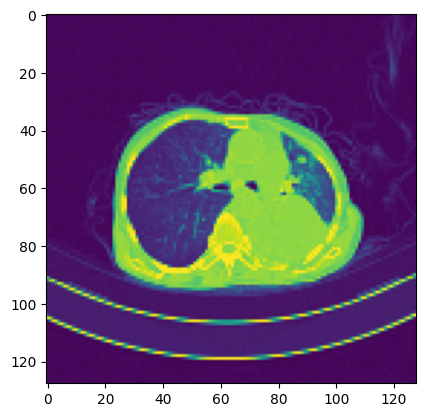

In [12]:
import matplotlib.pyplot as plt
import random
index = random.randint(0,len(x_train))
plt.imshow(x_train[index,:])
plt.show()

# Set Model

In [13]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Dense , Flatten

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(128,128,1)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile Model

In [14]:
model.compile(loss="sparse_categorical_crossentropy" , optimizer="adam" , metrics=['accuracy'])

# Fit model

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.fit(x_train,y_train, epochs=30 , batch_size=64 , callbacks=[early_stopping])

Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.4640 - loss: 1.0211
Epoch 2/30


/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.6613 - loss: 0.8211
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.7182 - loss: 0.6675
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.7921 - loss: 0.5463
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.8237 - loss: 0.4369
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.9135 - loss: 0.2538
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.9619 - loss: 0.1337
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9832 - loss: 0.0544
Epoch 9/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9688 - loss: 0.0825
Epoch 10/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.9971 - loss: 0.0221
Epoch 11/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.9951 - loss: 0.0183
Epoch 12/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9991 - loss: 0.0084
Epoch 13/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9953 - loss: 0.0159

# Save model for deployment

In [ ]:
model.save("lung_cancer_model.h5")

In [ ]:
from google.colab import files
files.download("lung_cancer_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Predict output

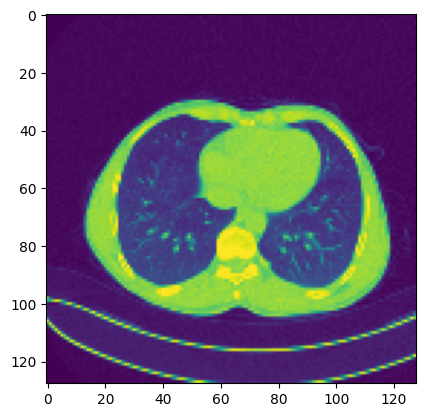

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 533ms/step
Prediction :  2


In [16]:
index2 = random.randint(0,len(x_test))
plt.imshow(x_test[index2,:])
plt.show()

y_prediction = model.predict(x_test)
y_classes = [np.argmax(element) for element in y_prediction]
print("Prediction : " , y_classes[index2])

In [17]:
if y_classes[index2] == 0:
  print("Benign cancer case.")
  print("Non-cancerous tumors, cells don't spread to other tissues.")
  print("A doctor will monitor or remove the tumor if it causes pressure or symptoms")
elif y_classes[index2] == 1:
  print("Malignant cancer cases")
  print("Cancerous tumors; cells grow aggressively and can spread")
  print("Requires urgent medical treatment such as surgery, chemotherapy, or radiation")
else:
  print("Normal case")
  print("No cancer detected")
  print("No treatment needed, but regular checkups are advised if the person is at risk (e.g., smoker, family history)")

Normal case
No cancer detected
No treatment needed, but regular checkups are advised if the person is at risk (e.g., smoker, family history)
